In [3]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [4]:
import random
import csv
import warnings
warnings.filterwarnings(action='ignore')


In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy

In [6]:
from sklearn.metrics import accuracy_score                              # check model accuracy
from sklearn.linear_model import LogisticRegression                     # Logistic Regression
from sklearn.cross_validation import train_test_split                   # Split data set into training and testing
from sklearn import svm                                                 # Support Vector Machine
from sklearn.svm import SVC, LinearSVC                                  # Support Vector Classifier(Linear SVC)
from sklearn import tree                                                # Trees
from sklearn.ensemble import RandomForestClassifier                     # Random Forest Classifier
from sklearn.ensemble import  AdaBoostClassifier                        # AdaBoost Classifier
from sklearn.naive_bayes import GaussianNB                              # Gaussian Naive Bayes
from sklearn.neighbors import KNeighborsClassifier                      # K Nearest Neighbors
from sklearn.neural_network import MLPClassifier                        # Multi Layer Percepteron (Neural Networks)
from sklearn.tree import DecisionTreeClassifier                         # Decision Tree Classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis # Quadratic Discriminant Analysis 
from sklearn.gaussian_process import GaussianProcessClassifier          # Gaussian Process Classifier
from sklearn.ensemble import GradientBoostingClassifier                 # Gradient Boosting Classifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import ExtraTreeClassifier


/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
from sklearn.model_selection import KFold  
from sklearn import cross_validation

In [8]:
#*******************************************************************
#********************** manage data files **************************
#*******************************************************************

In [26]:
import glob
data_fnames = sorted(glob.glob('../comfort_data/cleaned/*.csv'))
data_fnames

['../comfort_data/cleaned/Person_1.csv',
 '../comfort_data/cleaned/Person_2.csv',
 '../comfort_data/cleaned/Person_3.csv',
 '../comfort_data/cleaned/Person_4.csv',
 '../comfort_data/cleaned/Person_5.csv']

In [27]:
f_name = data_fnames[3]
f_name

'../comfort_data/cleaned/Person_4.csv'

In [28]:
base_df = pd.read_csv(f_name)
base_df.head(1).T

,0
Unnamed: 0,18
currentTime,5/12/2016 11:52:37
Data Type,1
heartRateQuality,NaN
heartRate,0
accelerometerX,-0.2493
accelerometerY,0.9265
accelerometerZ,-0.2537
accelerometerX2,-0.2493
accelerometerY2,0.9265


In [29]:
base_df.shape

(209, 70)

In [30]:
clms1 = ['roomTempreture', 'roomHumidity', 'heartRate', 'skinTemperature', 'clothingScore', 'met',
        'resistance', 'vote', 'vote2']
df_1 = base_df[clms1]
df_1.tail(1).T

,208
roomTempreture,23.433333
roomHumidity,58.500000
heartRate,73.000000
skinTemperature,27.480000
clothingScore,0.560000
met,1.368332
resistance,12653.000000
vote,1.000000
vote2,0.000000


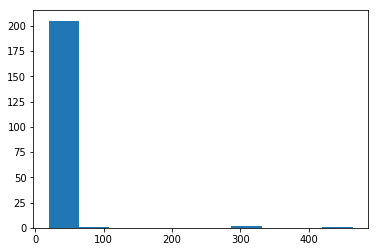

In [32]:
plt.hist(df_1['roomTempreture'])
plt.show()

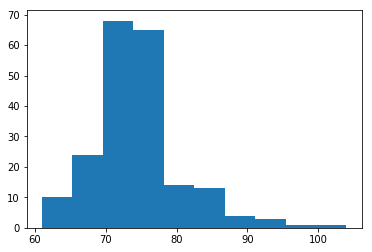

In [33]:
df_1 = df_1[df_1['heartRate'] > 40]
plt.hist(df_1['heartRate'])
plt.show()

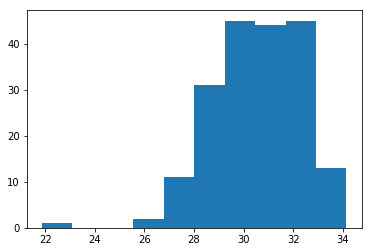

In [34]:
df_1 = df_1[df_1['skinTemperature'] > 10]
plt.hist(df_1['skinTemperature'])
plt.show()

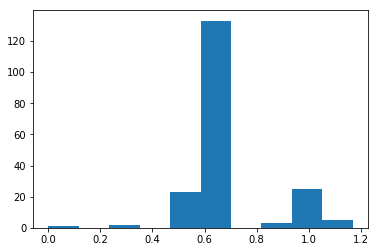

In [35]:
plt.hist(df_1['clothingScore'])
plt.show()

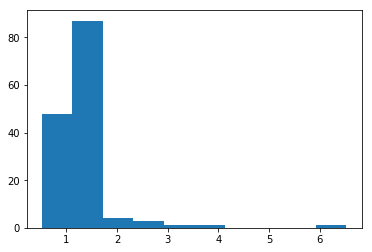

In [36]:
df_1 = df_1[df_1['met'] > 0.4]
plt.hist(df_1['met'])
plt.show()

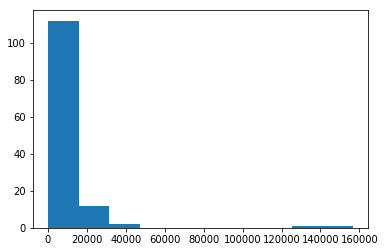

In [37]:
df2 = df_1[(df_1['resistance'] < 200000)]
plt.hist(df2['resistance'])
plt.show()

In [38]:
df2.shape, df_1.shape

((128, 9), (145, 9))

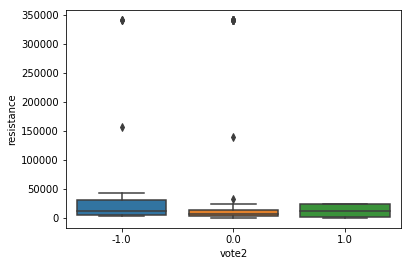

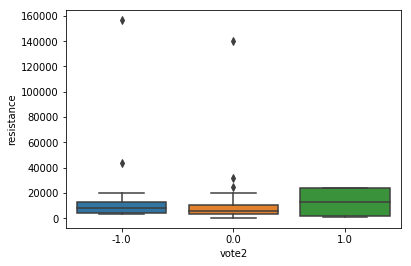

In [39]:
#plt.boxplot(df_1, column='resistance', by='vote2')
sns.boxplot(x="vote2", y="resistance", data=df_1)
plt.show()
sns.boxplot(x="vote2", y="resistance", data=df2)
plt.show()

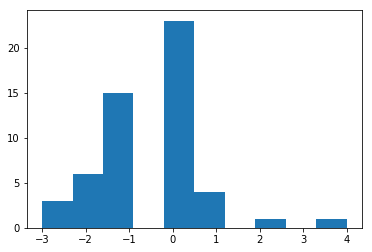

In [18]:
plt.hist(df_1['vote'])
plt.show()

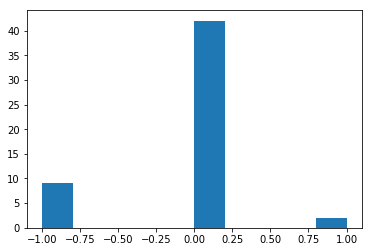

In [19]:
plt.hist(df_1['vote2'])
plt.show()

In [20]:
df_1.shape

(53, 9)

In [21]:
df_1.dtypes

roomTempreture     float64
roomHumidity       float64
heartRate          float64
skinTemperature    float64
clothingScore      float64
met                float64
resistance         float64
vote               float64
vote2              float64
dtype: object

In [41]:
X_train = df_1[clms1[:-2]]
X_train.head(1)

,roomTempreture,roomHumidity,heartRate,skinTemperature,clothingScore,met,resistance
1,24.444444,41.0,66.0,29.47,0.65,1.4868,12429.0


In [42]:
Y_train2 = df_1[clms1[-2]]
Y_train1 = df_1[clms1[-1]]

Y_train1.head(1)

1    0.0
Name: vote2, dtype: float64

In [43]:
# CSV file to store reesults

In [44]:
csv_out_fnamee = 'result.csv'
fi = open(csv_out_fnamee, 'w')
csv_out = csv.writer(fi, delimiter=',')

In [53]:
#*******************************************************************
#**********************  Machine Learning **************************
#*******************************************************************

In [54]:
# Model 1 : Decision Tree ( Different Types of Decision Tree with different length)

In [133]:
all_score=[]
ML_NAME='Decision Tree'
depth_list = np.concatenate((np.arange(1,10) , np.arange(10,20,2), np.arange(20,50, 5),  np.arange(50,150, 10)))
for depth in depth_list:
    clf=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=depth,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
    score = np.mean(cross_val_score(clf, X_train, Y_train1, n_jobs= 4, cv=4))
    csv_out.writerow([ML_NAME, depth, f_name, score])
    all_score.append(score)
    
all_score

[0.7964285714285715,
 0.7976190476190477,
 0.7351190476190476,
 0.7976190476190477,
 0.7797619047619048,
 0.7797619047619048,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762,
 0.761904761904762]

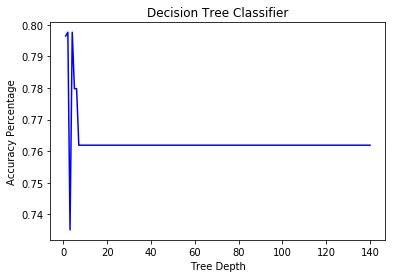

In [134]:
plt.plot(depth_list, all_score,color="blue",label="Train_Validation_Accuracy")
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Percentage')
plt.title("Decision Tree Classifier")

plt.show()

In [135]:
# Model 2 : GaussianNB

In [140]:
ML_NAME='Gaussian Naive Bayes'
clf=GaussianNB(priors=None)

score = np.mean(cross_val_score(clf, X_train, Y_train1, n_jobs= 4, cv=4))
csv_out.writerow([ML_NAME, depth, f_name, score])
score

0.8559523809523809

In [141]:
# Model 3 : AdaBoostClassifier

In [146]:
all_score=[]
ML_NAME='AdaBoost classifier'
noestimator=np.arange(5, 1000, 20)

for n in noestimator:
    clf=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                       learning_rate=0.1, n_estimators=n, random_state=None)
    score = np.median(cross_val_score(clf, X_train, Y_train1, n_jobs= 4, cv=4))
    csv_out.writerow([ML_NAME, depth, f_name, score])
    all_score.append(score)
all_score

[0.8095238095238095,
 0.8166666666666667,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761904762,
 0.8511904761

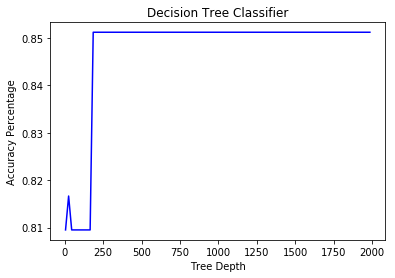

In [147]:
plt.plot(noestimator, all_score,color="blue",label="Train_Validation_Accuracy")
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Percentage')
plt.title("Decision Tree Classifier")

plt.show()

In [148]:
#Model 4:GaussianProcessClassifier

In [232]:
all_score=[]
ML_NAME='Gradient Boosting Classifier'
noestimator=np.arange(5, 500, 20)

for n in noestimator:
    clf = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=n,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
    score = np.mean(cross_val_score(clf, X_train, Y_train1, n_jobs= 4, cv=4))
    #csv_out.writerow([ML_NAME, depth, f_name, score])
    all_score.append(score)
all_score

[0.8184523809523809,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8392857142857142,
 0.8392857142857142,
 0.8392857142857142,
 0.8392857142857142,
 0.8392857142857142,
 0.8392857142857142,
 0.8392857142857142,
 0.8392857142857142,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714]

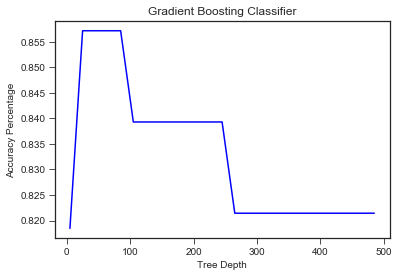

In [233]:
plt.plot(noestimator, all_score,color="blue",label="Train_Validation_Accuracy")
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Percentage')
plt.title(ML_NAME)

plt.show()

In [231]:
#Model 5: SVM rbf

In [160]:
all_score=[]
ML_NAME='Support Vector Machines - RBF'
c_values = np.concatenate((np.arange(0.1,1, 0.2), np.arange(1,10) , np.arange(10,20,2), np.arange(20,50, 5),  np.arange(50,150, 10)))
for c in c_values:
    clf=SVC(C=c, kernel='rbf')
    score = np.mean(cross_val_score(clf, X_train, Y_train1, n_jobs= 4, cv=7))
    csv_out.writerow([ML_NAME, depth, f_name, score])
    all_score.append(score)
    
all_score

[0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871,
 0.7930283224400871]

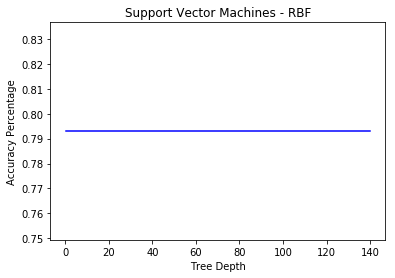

In [161]:
plt.plot(c_values, all_score,color="blue",label="Train_Validation_Accuracy")
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Percentage')
plt.title(ML_NAME)

plt.show()

In [162]:
#Model 6: SVM poly

In [164]:
all_score=[]
ML_NAME='Support Vector Machines - Poly'
c_values = np.concatenate((np.arange(0.1,1, 0.2), np.arange(1,10) , np.arange(10,20,2), np.arange(20,50, 5),  np.arange(50,150, 10)))
for c in c_values:
    clf=SVC(C=c, kernel='poly')
    score = np.mean(cross_val_score(clf, X_train, Y_train1, n_jobs= 4, cv=7))
    csv_out.writerow([ML_NAME, depth, f_name, score])
    all_score.append(score)
    
all_score

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (35,) and (0,)

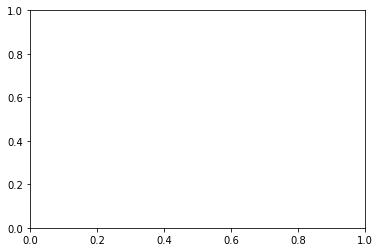

In [165]:
plt.plot(c_values, all_score,color="blue",label="Train_Validation_Accuracy")
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Percentage')
plt.title(ML_NAME)

plt.show()

In [166]:
#Model 7: SVM sigmoid

In [167]:
all_score=[]
ML_NAME='Support Vector Machines - Sigmoid'
c_values = np.concatenate((np.arange(0.1,1, 0.2), np.arange(1,10) , np.arange(10,20,2), np.arange(20,50, 5),  np.arange(50,150, 10)))
for c in c_values:
    clf=SVC(C=c, kernel='sigmoid')
    score = np.mean(cross_val_score(clf, X_train, Y_train1, n_jobs= 4, cv=7))
    csv_out.writerow([ML_NAME, depth, f_name, score])
    all_score.append(score)
    
all_score

[0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374]

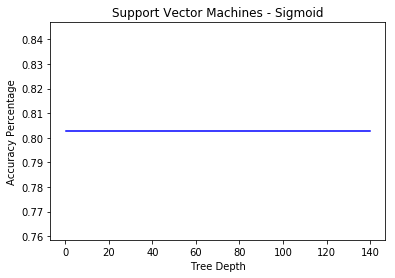

In [168]:
plt.plot(c_values, all_score,color="blue",label="Train_Validation_Accuracy")
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Percentage')
plt.title(ML_NAME)

plt.show()

In [ ]:
#Model 8: SVM Linear

In [169]:
all_score=[]
ML_NAME='Support Vector Machines - Linear'
c_values = np.concatenate((np.arange(0.1,1, 0.2), np.arange(1,10) , np.arange(10,20,2), np.arange(20,50, 5),  np.arange(50,150, 10)))
for c in c_values:
    clf=SVC(C=c, kernel='linear')
    score = np.mean(cross_val_score(clf, X_train, Y_train1, n_jobs= 4, cv=7))
    csv_out.writerow([ML_NAME, depth, f_name, score])
    all_score.append(score)
    
all_score

[0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705,
 0.8276643990929705]

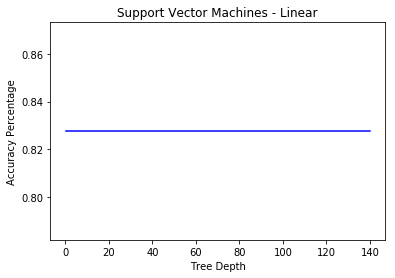

In [170]:
plt.plot(c_values, all_score,color="blue",label="Train_Validation_Accuracy")
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Percentage')
plt.title(ML_NAME)

plt.show()

In [171]:
#Model 9: KNeighborsClassifier

In [177]:
all_score=[]
ML_NAME='k-nearest neighbors Classifier'
n_neighbors = np.concatenate((np.arange(1,10) , np.arange(10,20,2), np.arange(20,50, 5),  np.arange(50,150, 10)))
ns=[]
for n in n_neighbors:
    if n < len(X_train)/2:
        clf=KNeighborsClassifier(n_neighbors=n)
        score = np.mean(cross_val_score(clf, X_train, Y_train1, n_jobs= 4, cv=7))
        csv_out.writerow([ML_NAME, depth, f_name, score])
        all_score.append(score)
    
        ns.append(n)
all_score

[0.7301587301587302,
 0.655328798185941,
 0.8231292517006803,
 0.8231292517006803,
 0.8639455782312925,
 0.8639455782312925,
 0.8276643990929705,
 0.8639455782312925,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374]

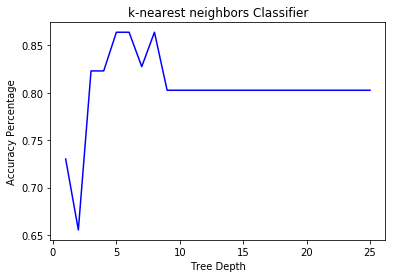

In [178]:
plt.plot(ns, all_score,color="blue",label="Train_Validation_Accuracy")
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Percentage')
plt.title(ML_NAME)

plt.show()

In [ ]:
#Model 10: RadiusNeighborsClassifier

In [184]:
all_score=[]
ML_NAME='Radius Neighbors Classifier'
n_neighbors = np.concatenate((np.arange(1,10) , np.arange(10,20,2), np.arange(20,50, 5),  np.arange(50,150, 10)))
ns=[]
for n in n_neighbors:
    if n < 2:
        clf=RadiusNeighborsClassifier(radius=n)
        score = np.mean(cross_val_score(clf, X_train, Y_train1, n_jobs= 4, cv=7))
        csv_out.writerow([ML_NAME, depth, f_name, score])
        all_score.append(score)
        
        ns.append(n)
    
all_score

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x1044cec90, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/mrafaie/git/research/comfort/personal_com...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/mrafaie/git/research/comfort/personal_com...lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/mrafa.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x1044cec90, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/mrafaie/git/research/comfort/personal_com...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/mrafaie/git/research/comfort/personal_com...lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/mrafa.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/tornado/platform/asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Uni...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py in run_forever(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
    416             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    417                                    finalizer=self._asyncgen_finalizer_hook)
    418         try:
    419             events._set_running_loop(self)
    420             while True:
--> 421                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_UnixS...EventLoop running=True closed=False debug=False>>
    422                 if self._stopping:
    423                     break
    424         finally:
    425             self._stopping = False

...........................................................................
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py in _run_once(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
   1421                         logger.warning('Executing %s took %.3f seconds',
   1422                                        _format_handle(handle), dt)
   1423                 finally:
   1424                     self._current_handle = None
   1425             else:
-> 1426                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(14, 1)>>
   1427         handle = None  # Needed to break cycles when an exception occurs.
   1428 
   1429     def _set_coroutine_wrapper(self, enabled):
   1430         try:

...........................................................................
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(14, 1)>)
    122             self._callback = None
    123             self._args = None
    124 
    125     def _run(self):
    126         try:
--> 127             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (14, 1)
    128         except Exception as exc:
    129             cb = _format_callback_source(self._callback, self._args)
    130             msg = 'Exception in callback {}'.format(cb)
    131             context = {

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/tornado/platform/asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=14, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "all_score=[]\nML_NAME='Radius Neighbors Classifie...ore)\n        \n        ns.append(n)\n    \nall_score", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 25, 1, 24, 0, 869442, tzinfo=tzutc()), 'msg_id': '0d7a507ca73f44d6b8ce4b99be4e9b2c', 'msg_type': 'execute_request', 'session': '1154ace3db70419a8ed8c80c2e5c0f33', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '0d7a507ca73f44d6b8ce4b99be4e9b2c', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'1154ace3db70419a8ed8c80c2e5c0f33']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "all_score=[]\nML_NAME='Radius Neighbors Classifie...ore)\n        \n        ns.append(n)\n    \nall_score", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 25, 1, 24, 0, 869442, tzinfo=tzutc()), 'msg_id': '0d7a507ca73f44d6b8ce4b99be4e9b2c', 'msg_type': 'execute_request', 'session': '1154ace3db70419a8ed8c80c2e5c0f33', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '0d7a507ca73f44d6b8ce4b99be4e9b2c', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'1154ace3db70419a8ed8c80c2e5c0f33'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "all_score=[]\nML_NAME='Radius Neighbors Classifie...ore)\n        \n        ns.append(n)\n    \nall_score", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 25, 1, 24, 0, 869442, tzinfo=tzutc()), 'msg_id': '0d7a507ca73f44d6b8ce4b99be4e9b2c', 'msg_type': 'execute_request', 'session': '1154ace3db70419a8ed8c80c2e5c0f33', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '0d7a507ca73f44d6b8ce4b99be4e9b2c', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="all_score=[]\nML_NAME='Radius Neighbors Classifie...ore)\n        \n        ns.append(n)\n    \nall_score", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "all_score=[]\nML_NAME='Radius Neighbors Classifie...ore)\n        \n        ns.append(n)\n    \nall_score"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("all_score=[]\nML_NAME='Radius Neighbors Classifie...ore)\n        \n        ns.append(n)\n    \nall_score",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("all_score=[]\nML_NAME='Radius Neighbors Classifie...ore)\n        \n        ns.append(n)\n    \nall_score",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="all_score=[]\nML_NAME='Radius Neighbors Classifie...ore)\n        \n        ns.append(n)\n    \nall_score", store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = "all_score=[]\nML_NAME='Radius Neighbors Classifie...ore)\n        \n        ns.append(n)\n    \nall_score"
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="all_score=[]\nML_NAME='Radius Neighbors Classifie...ore)\n        \n        ns.append(n)\n    \nall_score", store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.For object>, <_ast.Expr object>], cell_name='<ipython-input-184-060114d43b32>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1155b7908, execution_...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x115347420, file "<ipython-input-184-060114d43b32>", line 5>
        result = <ExecutionResult object at 1155b7908, execution_...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x115347420, file "<ipython-input-184-060114d43b32>", line 5>, result=<ExecutionResult object at 1155b7908, execution_...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x115347420, file "<ipython-input-184-060114d43b32>", line 5>
        self.user_global_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'Counter': <class 'collections.Counter'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GaussianProcessClassifier': <class 'sklearn.gaussian_process.gpc.GaussianProcessClassifier'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'In': ['', "import pandas as pd\nimport numpy as np\nfrom coll...gic('matplotlib', 'inline')\nimport seaborn as sns", 'import random', 'import statsmodels.api as sm\nimport statsmodels....port statsmodels.graphics.api as smg\nimport patsy', 'from sklearn.metrics import accuracy_score      ...om sklearn.model_selection import cross_val_score', 'from sklearn.model_selection import KFold  \nfrom sklearn import cross_validation', '#***********************************************...*************************************************', "import glob\ndata_fnames = sorted(glob.glob('../comfort_data/cleand/*.csv'))", 'f_name = data_fnames[0]\nf_name', 'base_df = pd.read_csv(f_name)\nbase_df.head(1).T', 'base_df.shape', "clms1 = ['roomTempreture', 'roomHumidity', 'hear...e', 'vote2']\ndf_1 = base_df[clms1]\ndf_1.tail(1).T", "plt.hist(df_1['roomTempreture'])\nplt.show()", "df_1 = df_1[df_1['heartRate'] > 40]\nplt.hist(df_1['heartRate'])\nplt.show()", "df_1 = df_1[df_1['skinTemperature'] > 10]\nplt.hist(df_1['skinTemperature'])\nplt.show()", "plt.hist(df_1['clothingScore'])\nplt.show()", "df_1 = df_1[df_1['met'] > 0.4]\nplt.hist(df_1['met'])\nplt.show()", "plt.hist(df_1['resistance'])\nplt.show()", "plt.hist(df_1['vote'])\nplt.show()", "plt.hist(df_1['vote2'])\nplt.show()", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, ...}
        self.user_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'Counter': <class 'collections.Counter'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GaussianProcessClassifier': <class 'sklearn.gaussian_process.gpc.GaussianProcessClassifier'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'In': ['', "import pandas as pd\nimport numpy as np\nfrom coll...gic('matplotlib', 'inline')\nimport seaborn as sns", 'import random', 'import statsmodels.api as sm\nimport statsmodels....port statsmodels.graphics.api as smg\nimport patsy', 'from sklearn.metrics import accuracy_score      ...om sklearn.model_selection import cross_val_score', 'from sklearn.model_selection import KFold  \nfrom sklearn import cross_validation', '#***********************************************...*************************************************', "import glob\ndata_fnames = sorted(glob.glob('../comfort_data/cleand/*.csv'))", 'f_name = data_fnames[0]\nf_name', 'base_df = pd.read_csv(f_name)\nbase_df.head(1).T', 'base_df.shape', "clms1 = ['roomTempreture', 'roomHumidity', 'hear...e', 'vote2']\ndf_1 = base_df[clms1]\ndf_1.tail(1).T", "plt.hist(df_1['roomTempreture'])\nplt.show()", "df_1 = df_1[df_1['heartRate'] > 40]\nplt.hist(df_1['heartRate'])\nplt.show()", "df_1 = df_1[df_1['skinTemperature'] > 10]\nplt.hist(df_1['skinTemperature'])\nplt.show()", "plt.hist(df_1['clothingScore'])\nplt.show()", "df_1 = df_1[df_1['met'] > 0.4]\nplt.hist(df_1['met'])\nplt.show()", "plt.hist(df_1['resistance'])\nplt.show()", "plt.hist(df_1['vote'])\nplt.show()", "plt.hist(df_1['vote2'])\nplt.show()", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/notebooks/<ipython-input-184-060114d43b32> in <module>()
      3 n_neighbors = np.concatenate((np.arange(1,10) , np.arange(10,20,2), np.arange(20,50, 5),  np.arange(50,150, 10)))
      4 ns=[]
      5 for n in n_neighbors:
      6     if n < 2:
      7         clf=RadiusNeighborsClassifier(radius=n)
----> 8         score = np.mean(cross_val_score(clf, X_train, Y_train1, n_jobs= 4, cv=7))
      9         csv_out.writerow([ML_NAME, depth, f_name, score])
     10         all_score.append(score)
     11         
     12         ns.append(n)

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in cross_val_score(estimator=RadiusNeighborsClassifier(algorithm='auto', leaf...e, p=2, radius=1,
             weights='uniform'), X=    roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
59  1.00001     60134.0  , y=0     1.0
1     1.0
2     0.0
3     0.0
4     0....0
58   -1.0
59    0.0
Name: vote2, dtype: float64, groups=None, scoring=None, cv=7, n_jobs=4, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    337     cv_results = cross_validate(estimator=estimator, X=X, y=y, groups=groups,
    338                                 scoring={'score': scorer}, cv=cv,
    339                                 return_train_score=False,
    340                                 n_jobs=n_jobs, verbose=verbose,
    341                                 fit_params=fit_params,
--> 342                                 pre_dispatch=pre_dispatch)
        pre_dispatch = '2*n_jobs'
    343     return cv_results['test_score']
    344 
    345 
    346 def _fit_and_score(estimator, X, y, scorer, train, test, verbose,

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in cross_validate(estimator=RadiusNeighborsClassifier(algorithm='auto', leaf...e, p=2, radius=1,
             weights='uniform'), X=    roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
59  1.00001     60134.0  , y=0     1.0
1     1.0
2     0.0
3     0.0
4     0....0
58   -1.0
59    0.0
Name: vote2, dtype: float64, groups=None, scoring={'score': <function _passthrough_scorer>}, cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False), n_jobs=4, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=False)
    201     scores = parallel(
    202         delayed(_fit_and_score)(
    203             clone(estimator), X, y, scorers, train, test, verbose, None,
    204             fit_params, return_train_score=return_train_score,
    205             return_times=True)
--> 206         for train, test in cv.split(X, y, groups))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=7, random_state=None, shuffle=False)>
        X =     roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
59  1.00001     60134.0  
        y = 0     1.0
1     1.0
2     0.0
3     0.0
4     0....0
58   -1.0
59    0.0
Name: vote2, dtype: float64
        groups = None
    207 
    208     if return_train_score:
    209         train_scores, test_scores, fit_times, score_times = zip(*scores)
    210         train_scores = _aggregate_score_dicts(train_scores)

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object cross_validate.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Tue Apr 24 20:24:01 2018
PID: 39025Python 3.6.3: /Users/mrafaie/git/research/comfort/personal_comfort/env/py3/bin/python3
...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (RadiusNeighborsClassifier(algorithm='auto', leaf...e, p=2, radius=1,
             weights='uniform'),     roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
59  1.00001     60134.0  , 0     1.0
1     1.0
2     0.0
3     0.0
4     0....0
58   -1.0
59    0.0
Name: vote2, dtype: float64, {'score': <function _passthrough_scorer>}, array([ 1,  8,  9, 11, 12, 14, 15, 16, 17, 18, 1...,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52]), array([ 0,  2,  3,  4,  5,  6,  7, 10, 13]), 0, None, None), {'return_times': True, 'return_train_score': False})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RadiusNeighborsClassifier(algorithm='auto', leaf...e, p=2, radius=1,
             weights='uniform'),     roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
59  1.00001     60134.0  , 0     1.0
1     1.0
2     0.0
3     0.0
4     0....0
58   -1.0
59    0.0
Name: vote2, dtype: float64, {'score': <function _passthrough_scorer>}, array([ 1,  8,  9, 11, 12, 14, 15, 16, 17, 18, 1...,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52]), array([ 0,  2,  3,  4,  5,  6,  7, 10, 13]), 0, None, None)
        kwargs = {'return_times': True, 'return_train_score': False}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=RadiusNeighborsClassifier(algorithm='auto', leaf...e, p=2, radius=1,
             weights='uniform'), X=    roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
59  1.00001     60134.0  , y=0     1.0
1     1.0
2     0.0
3     0.0
4     0....0
58   -1.0
59    0.0
Name: vote2, dtype: float64, scorer={'score': <function _passthrough_scorer>}, train=array([ 1,  8,  9, 11, 12, 14, 15, 16, 17, 18, 1...,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52]), test=array([ 0,  2,  3,  4,  5,  6,  7, 10, 13]), verbose=0, parameters=None, fit_params={}, return_train_score=False, return_parameters=False, return_n_test_samples=False, return_times=True, error_score='raise')
    483                              " make sure that it has been spelled correctly.)")
    484 
    485     else:
    486         fit_time = time.time() - start_time
    487         # _score will return dict if is_multimetric is True
--> 488         test_scores = _score(estimator, X_test, y_test, scorer, is_multimetric)
        test_scores = {}
        estimator = RadiusNeighborsClassifier(algorithm='auto', leaf...e, p=2, radius=1,
             weights='uniform')
        X_test =     roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
15  1.00001     19078.0  
        y_test = 0     1.0
2     0.0
3     0.0
4     0.0
5     0....0
11   -1.0
15   -1.0
Name: vote2, dtype: float64
        scorer = {'score': <function _passthrough_scorer>}
        is_multimetric = True
    489         score_time = time.time() - start_time - fit_time
    490         if return_train_score:
    491             train_scores = _score(estimator, X_train, y_train, scorer,
    492                                   is_multimetric)

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _score(estimator=RadiusNeighborsClassifier(algorithm='auto', leaf...e, p=2, radius=1,
             weights='uniform'), X_test=    roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
15  1.00001     19078.0  , y_test=0     1.0
2     0.0
3     0.0
4     0.0
5     0....0
11   -1.0
15   -1.0
Name: vote2, dtype: float64, scorer={'score': <function _passthrough_scorer>}, is_multimetric=True)
    518 
    519     Will return a single float if is_multimetric is False and a dict of floats,
    520     if is_multimetric is True
    521     """
    522     if is_multimetric:
--> 523         return _multimetric_score(estimator, X_test, y_test, scorer)
        estimator = RadiusNeighborsClassifier(algorithm='auto', leaf...e, p=2, radius=1,
             weights='uniform')
        X_test =     roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
15  1.00001     19078.0  
        y_test = 0     1.0
2     0.0
3     0.0
4     0.0
5     0....0
11   -1.0
15   -1.0
Name: vote2, dtype: float64
        scorer = {'score': <function _passthrough_scorer>}
    524     else:
    525         if y_test is None:
    526             score = scorer(estimator, X_test)
    527         else:

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _multimetric_score(estimator=RadiusNeighborsClassifier(algorithm='auto', leaf...e, p=2, radius=1,
             weights='uniform'), X_test=    roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
15  1.00001     19078.0  , y_test=0     1.0
2     0.0
3     0.0
4     0.0
5     0....0
11   -1.0
15   -1.0
Name: vote2, dtype: float64, scorers={'score': <function _passthrough_scorer>})
    548 
    549     for name, scorer in scorers.items():
    550         if y_test is None:
    551             score = scorer(estimator, X_test)
    552         else:
--> 553             score = scorer(estimator, X_test, y_test)
        score = undefined
        scorer = <function _passthrough_scorer>
        estimator = RadiusNeighborsClassifier(algorithm='auto', leaf...e, p=2, radius=1,
             weights='uniform')
        X_test =     roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
15  1.00001     19078.0  
        y_test = 0     1.0
2     0.0
3     0.0
4     0.0
5     0....0
11   -1.0
15   -1.0
Name: vote2, dtype: float64
    554 
    555         if hasattr(score, 'item'):
    556             try:
    557                 # e.g. unwrap memmapped scalars

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/metrics/scorer.py in _passthrough_scorer(estimator=RadiusNeighborsClassifier(algorithm='auto', leaf...e, p=2, radius=1,
             weights='uniform'), *args=(    roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
15  1.00001     19078.0  , 0     1.0
2     0.0
3     0.0
4     0.0
5     0....0
11   -1.0
15   -1.0
Name: vote2, dtype: float64), **kwargs={})
    239     return scorer
    240 
    241 
    242 def _passthrough_scorer(estimator, *args, **kwargs):
    243     """Function that wraps estimator.score"""
--> 244     return estimator.score(*args, **kwargs)
        estimator.score = <bound method ClassifierMixin.score of RadiusNei..., p=2, radius=1,
             weights='uniform')>
        args = (    roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
15  1.00001     19078.0  , 0     1.0
2     0.0
3     0.0
4     0.0
5     0....0
11   -1.0
15   -1.0
Name: vote2, dtype: float64)
        kwargs = {}
    245 
    246 
    247 def check_scoring(estimator, scoring=None, allow_none=False):
    248     """Determine scorer from user options.

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/base.py in score(self=RadiusNeighborsClassifier(algorithm='auto', leaf...e, p=2, radius=1,
             weights='uniform'), X=    roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
15  1.00001     19078.0  , y=0     1.0
2     0.0
3     0.0
4     0.0
5     0....0
11   -1.0
15   -1.0
Name: vote2, dtype: float64, sample_weight=None)
    344         score : float
    345             Mean accuracy of self.predict(X) wrt. y.
    346 
    347         """
    348         from .metrics import accuracy_score
--> 349         return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
        accuracy_score = <function accuracy_score>
        y = 0     1.0
2     0.0
3     0.0
4     0.0
5     0....0
11   -1.0
15   -1.0
Name: vote2, dtype: float64
        self.predict = <bound method RadiusNeighborsClassifier.predict ..., p=2, radius=1,
             weights='uniform')>
        X =     roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
15  1.00001     19078.0  
        sample_weight = None
    350 
    351 
    352 ###############################################################################
    353 class RegressorMixin(object):

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/neighbors/classification.py in predict(self=RadiusNeighborsClassifier(algorithm='auto', leaf...e, p=2, radius=1,
             weights='uniform'), X=array([[2.33333333e+01, 4.40000000e+01, 9.600000...3.10000000e-01, 1.00001000e+00, 1.90780000e+04]]))
    358         elif outliers:
    359             raise ValueError('No neighbors found for test samples %r, '
    360                              'you can try using larger radius, '
    361                              'give a label for outliers, '
    362                              'or consider removing them from your dataset.'
--> 363                              % outliers)
        outliers = [0, 1, 2, 3, 4, 5, 6, 8]
    364 
    365         weights = _get_weights(neigh_dist, self.weights)
    366 
    367         y_pred = np.empty((n_samples, n_outputs), dtype=classes_[0].dtype)

ValueError: No neighbors found for test samples [0, 1, 2, 3, 4, 5, 6, 8], you can try using larger radius, give a label for outliers, or consider removing them from your dataset.
___________________________________________________________________________

In [188]:
clf=RadiusNeighborsClassifier(radius=100)
score = np.mean(cross_val_score(clf, X_train, Y_train1, n_jobs= 7, cv=7))

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x1044cec90, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/mrafaie/git/research/comfort/personal_com...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/mrafaie/git/research/comfort/personal_com...lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/mrafa.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x1044cec90, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/mrafaie/git/research/comfort/personal_com...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/mrafaie/git/research/comfort/personal_com...lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/mrafa.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/tornado/platform/asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Uni...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py in run_forever(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
    416             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    417                                    finalizer=self._asyncgen_finalizer_hook)
    418         try:
    419             events._set_running_loop(self)
    420             while True:
--> 421                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_UnixS...EventLoop running=True closed=False debug=False>>
    422                 if self._stopping:
    423                     break
    424         finally:
    425             self._stopping = False

...........................................................................
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py in _run_once(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
   1421                         logger.warning('Executing %s took %.3f seconds',
   1422                                        _format_handle(handle), dt)
   1423                 finally:
   1424                     self._current_handle = None
   1425             else:
-> 1426                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(14, 1)>>
   1427         handle = None  # Needed to break cycles when an exception occurs.
   1428 
   1429     def _set_coroutine_wrapper(self, enabled):
   1430         try:

...........................................................................
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(14, 1)>)
    122             self._callback = None
    123             self._args = None
    124 
    125     def _run(self):
    126         try:
--> 127             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (14, 1)
    128         except Exception as exc:
    129             cb = _format_callback_source(self._callback, self._args)
    130             msg = 'Exception in callback {}'.format(cb)
    131             context = {

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/tornado/platform/asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=14, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'clf=RadiusNeighborsClassifier(radius=100)\nscore ...l_score(clf, X_train, Y_train1, n_jobs= 7, cv=7))', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 25, 1, 28, 13, 74288, tzinfo=tzutc()), 'msg_id': '5adb3dbe20c74ecd975d63c70f3624af', 'msg_type': 'execute_request', 'session': '1154ace3db70419a8ed8c80c2e5c0f33', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '5adb3dbe20c74ecd975d63c70f3624af', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'1154ace3db70419a8ed8c80c2e5c0f33']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'clf=RadiusNeighborsClassifier(radius=100)\nscore ...l_score(clf, X_train, Y_train1, n_jobs= 7, cv=7))', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 25, 1, 28, 13, 74288, tzinfo=tzutc()), 'msg_id': '5adb3dbe20c74ecd975d63c70f3624af', 'msg_type': 'execute_request', 'session': '1154ace3db70419a8ed8c80c2e5c0f33', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '5adb3dbe20c74ecd975d63c70f3624af', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'1154ace3db70419a8ed8c80c2e5c0f33'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'clf=RadiusNeighborsClassifier(radius=100)\nscore ...l_score(clf, X_train, Y_train1, n_jobs= 7, cv=7))', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 25, 1, 28, 13, 74288, tzinfo=tzutc()), 'msg_id': '5adb3dbe20c74ecd975d63c70f3624af', 'msg_type': 'execute_request', 'session': '1154ace3db70419a8ed8c80c2e5c0f33', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '5adb3dbe20c74ecd975d63c70f3624af', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='clf=RadiusNeighborsClassifier(radius=100)\nscore ...l_score(clf, X_train, Y_train1, n_jobs= 7, cv=7))', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'clf=RadiusNeighborsClassifier(radius=100)\nscore ...l_score(clf, X_train, Y_train1, n_jobs= 7, cv=7))'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('clf=RadiusNeighborsClassifier(radius=100)\nscore ...l_score(clf, X_train, Y_train1, n_jobs= 7, cv=7))',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('clf=RadiusNeighborsClassifier(radius=100)\nscore ...l_score(clf, X_train, Y_train1, n_jobs= 7, cv=7))',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='clf=RadiusNeighborsClassifier(radius=100)\nscore ...l_score(clf, X_train, Y_train1, n_jobs= 7, cv=7))', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'clf=RadiusNeighborsClassifier(radius=100)\nscore ...l_score(clf, X_train, Y_train1, n_jobs= 7, cv=7))'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='clf=RadiusNeighborsClassifier(radius=100)\nscore ...l_score(clf, X_train, Y_train1, n_jobs= 7, cv=7))', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>], cell_name='<ipython-input-188-323e4638c5b5>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1154db588, execution_...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x1152fba50, file "<ipython-input-188-323e4638c5b5>", line 2>
        result = <ExecutionResult object at 1154db588, execution_...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x1152fba50, file "<ipython-input-188-323e4638c5b5>", line 2>, result=<ExecutionResult object at 1154db588, execution_...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x1152fba50, file "<ipython-input-188-323e4638c5b5>", line 2>
        self.user_global_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'Counter': <class 'collections.Counter'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GaussianProcessClassifier': <class 'sklearn.gaussian_process.gpc.GaussianProcessClassifier'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'In': ['', "import pandas as pd\nimport numpy as np\nfrom coll...gic('matplotlib', 'inline')\nimport seaborn as sns", 'import random', 'import statsmodels.api as sm\nimport statsmodels....port statsmodels.graphics.api as smg\nimport patsy', 'from sklearn.metrics import accuracy_score      ...om sklearn.model_selection import cross_val_score', 'from sklearn.model_selection import KFold  \nfrom sklearn import cross_validation', '#***********************************************...*************************************************', "import glob\ndata_fnames = sorted(glob.glob('../comfort_data/cleand/*.csv'))", 'f_name = data_fnames[0]\nf_name', 'base_df = pd.read_csv(f_name)\nbase_df.head(1).T', 'base_df.shape', "clms1 = ['roomTempreture', 'roomHumidity', 'hear...e', 'vote2']\ndf_1 = base_df[clms1]\ndf_1.tail(1).T", "plt.hist(df_1['roomTempreture'])\nplt.show()", "df_1 = df_1[df_1['heartRate'] > 40]\nplt.hist(df_1['heartRate'])\nplt.show()", "df_1 = df_1[df_1['skinTemperature'] > 10]\nplt.hist(df_1['skinTemperature'])\nplt.show()", "plt.hist(df_1['clothingScore'])\nplt.show()", "df_1 = df_1[df_1['met'] > 0.4]\nplt.hist(df_1['met'])\nplt.show()", "plt.hist(df_1['resistance'])\nplt.show()", "plt.hist(df_1['vote'])\nplt.show()", "plt.hist(df_1['vote2'])\nplt.show()", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, ...}
        self.user_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'Counter': <class 'collections.Counter'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GaussianProcessClassifier': <class 'sklearn.gaussian_process.gpc.GaussianProcessClassifier'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'In': ['', "import pandas as pd\nimport numpy as np\nfrom coll...gic('matplotlib', 'inline')\nimport seaborn as sns", 'import random', 'import statsmodels.api as sm\nimport statsmodels....port statsmodels.graphics.api as smg\nimport patsy', 'from sklearn.metrics import accuracy_score      ...om sklearn.model_selection import cross_val_score', 'from sklearn.model_selection import KFold  \nfrom sklearn import cross_validation', '#***********************************************...*************************************************', "import glob\ndata_fnames = sorted(glob.glob('../comfort_data/cleand/*.csv'))", 'f_name = data_fnames[0]\nf_name', 'base_df = pd.read_csv(f_name)\nbase_df.head(1).T', 'base_df.shape', "clms1 = ['roomTempreture', 'roomHumidity', 'hear...e', 'vote2']\ndf_1 = base_df[clms1]\ndf_1.tail(1).T", "plt.hist(df_1['roomTempreture'])\nplt.show()", "df_1 = df_1[df_1['heartRate'] > 40]\nplt.hist(df_1['heartRate'])\nplt.show()", "df_1 = df_1[df_1['skinTemperature'] > 10]\nplt.hist(df_1['skinTemperature'])\nplt.show()", "plt.hist(df_1['clothingScore'])\nplt.show()", "df_1 = df_1[df_1['met'] > 0.4]\nplt.hist(df_1['met'])\nplt.show()", "plt.hist(df_1['resistance'])\nplt.show()", "plt.hist(df_1['vote'])\nplt.show()", "plt.hist(df_1['vote2'])\nplt.show()", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/notebooks/<ipython-input-188-323e4638c5b5> in <module>()
      1 clf=RadiusNeighborsClassifier(radius=100)
----> 2 score = np.mean(cross_val_score(clf, X_train, Y_train1, n_jobs= 7, cv=7))

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in cross_val_score(estimator=RadiusNeighborsClassifier(algorithm='auto', leaf... p=2, radius=100,
             weights='uniform'), X=    roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
59  1.00001     60134.0  , y=0     1.0
1     1.0
2     0.0
3     0.0
4     0....0
58   -1.0
59    0.0
Name: vote2, dtype: float64, groups=None, scoring=None, cv=7, n_jobs=7, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    337     cv_results = cross_validate(estimator=estimator, X=X, y=y, groups=groups,
    338                                 scoring={'score': scorer}, cv=cv,
    339                                 return_train_score=False,
    340                                 n_jobs=n_jobs, verbose=verbose,
    341                                 fit_params=fit_params,
--> 342                                 pre_dispatch=pre_dispatch)
        pre_dispatch = '2*n_jobs'
    343     return cv_results['test_score']
    344 
    345 
    346 def _fit_and_score(estimator, X, y, scorer, train, test, verbose,

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in cross_validate(estimator=RadiusNeighborsClassifier(algorithm='auto', leaf... p=2, radius=100,
             weights='uniform'), X=    roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
59  1.00001     60134.0  , y=0     1.0
1     1.0
2     0.0
3     0.0
4     0....0
58   -1.0
59    0.0
Name: vote2, dtype: float64, groups=None, scoring={'score': <function _passthrough_scorer>}, cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False), n_jobs=7, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=False)
    201     scores = parallel(
    202         delayed(_fit_and_score)(
    203             clone(estimator), X, y, scorers, train, test, verbose, None,
    204             fit_params, return_train_score=return_train_score,
    205             return_times=True)
--> 206         for train, test in cv.split(X, y, groups))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=7, random_state=None, shuffle=False)>
        X =     roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
59  1.00001     60134.0  
        y = 0     1.0
1     1.0
2     0.0
3     0.0
4     0....0
58   -1.0
59    0.0
Name: vote2, dtype: float64
        groups = None
    207 
    208     if return_train_score:
    209         train_scores, test_scores, fit_times, score_times = zip(*scores)
    210         train_scores = _aggregate_score_dicts(train_scores)

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=7), iterable=<generator object cross_validate.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=7)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Tue Apr 24 20:28:13 2018
PID: 39396Python 3.6.3: /Users/mrafaie/git/research/comfort/personal_comfort/env/py3/bin/python3
...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (RadiusNeighborsClassifier(algorithm='auto', leaf... p=2, radius=100,
             weights='uniform'),     roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
59  1.00001     60134.0  , 0     1.0
1     1.0
2     0.0
3     0.0
4     0....0
58   -1.0
59    0.0
Name: vote2, dtype: float64, {'score': <function _passthrough_scorer>}, array([ 1,  8,  9, 11, 12, 14, 15, 16, 17, 18, 1...,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52]), array([ 0,  2,  3,  4,  5,  6,  7, 10, 13]), 0, None, None), {'return_times': True, 'return_train_score': False})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RadiusNeighborsClassifier(algorithm='auto', leaf... p=2, radius=100,
             weights='uniform'),     roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
59  1.00001     60134.0  , 0     1.0
1     1.0
2     0.0
3     0.0
4     0....0
58   -1.0
59    0.0
Name: vote2, dtype: float64, {'score': <function _passthrough_scorer>}, array([ 1,  8,  9, 11, 12, 14, 15, 16, 17, 18, 1...,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52]), array([ 0,  2,  3,  4,  5,  6,  7, 10, 13]), 0, None, None)
        kwargs = {'return_times': True, 'return_train_score': False}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=RadiusNeighborsClassifier(algorithm='auto', leaf... p=2, radius=100,
             weights='uniform'), X=    roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
59  1.00001     60134.0  , y=0     1.0
1     1.0
2     0.0
3     0.0
4     0....0
58   -1.0
59    0.0
Name: vote2, dtype: float64, scorer={'score': <function _passthrough_scorer>}, train=array([ 1,  8,  9, 11, 12, 14, 15, 16, 17, 18, 1...,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52]), test=array([ 0,  2,  3,  4,  5,  6,  7, 10, 13]), verbose=0, parameters=None, fit_params={}, return_train_score=False, return_parameters=False, return_n_test_samples=False, return_times=True, error_score='raise')
    483                              " make sure that it has been spelled correctly.)")
    484 
    485     else:
    486         fit_time = time.time() - start_time
    487         # _score will return dict if is_multimetric is True
--> 488         test_scores = _score(estimator, X_test, y_test, scorer, is_multimetric)
        test_scores = {}
        estimator = RadiusNeighborsClassifier(algorithm='auto', leaf... p=2, radius=100,
             weights='uniform')
        X_test =     roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
15  1.00001     19078.0  
        y_test = 0     1.0
2     0.0
3     0.0
4     0.0
5     0....0
11   -1.0
15   -1.0
Name: vote2, dtype: float64
        scorer = {'score': <function _passthrough_scorer>}
        is_multimetric = True
    489         score_time = time.time() - start_time - fit_time
    490         if return_train_score:
    491             train_scores = _score(estimator, X_train, y_train, scorer,
    492                                   is_multimetric)

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _score(estimator=RadiusNeighborsClassifier(algorithm='auto', leaf... p=2, radius=100,
             weights='uniform'), X_test=    roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
15  1.00001     19078.0  , y_test=0     1.0
2     0.0
3     0.0
4     0.0
5     0....0
11   -1.0
15   -1.0
Name: vote2, dtype: float64, scorer={'score': <function _passthrough_scorer>}, is_multimetric=True)
    518 
    519     Will return a single float if is_multimetric is False and a dict of floats,
    520     if is_multimetric is True
    521     """
    522     if is_multimetric:
--> 523         return _multimetric_score(estimator, X_test, y_test, scorer)
        estimator = RadiusNeighborsClassifier(algorithm='auto', leaf... p=2, radius=100,
             weights='uniform')
        X_test =     roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
15  1.00001     19078.0  
        y_test = 0     1.0
2     0.0
3     0.0
4     0.0
5     0....0
11   -1.0
15   -1.0
Name: vote2, dtype: float64
        scorer = {'score': <function _passthrough_scorer>}
    524     else:
    525         if y_test is None:
    526             score = scorer(estimator, X_test)
    527         else:

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _multimetric_score(estimator=RadiusNeighborsClassifier(algorithm='auto', leaf... p=2, radius=100,
             weights='uniform'), X_test=    roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
15  1.00001     19078.0  , y_test=0     1.0
2     0.0
3     0.0
4     0.0
5     0....0
11   -1.0
15   -1.0
Name: vote2, dtype: float64, scorers={'score': <function _passthrough_scorer>})
    548 
    549     for name, scorer in scorers.items():
    550         if y_test is None:
    551             score = scorer(estimator, X_test)
    552         else:
--> 553             score = scorer(estimator, X_test, y_test)
        score = undefined
        scorer = <function _passthrough_scorer>
        estimator = RadiusNeighborsClassifier(algorithm='auto', leaf... p=2, radius=100,
             weights='uniform')
        X_test =     roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
15  1.00001     19078.0  
        y_test = 0     1.0
2     0.0
3     0.0
4     0.0
5     0....0
11   -1.0
15   -1.0
Name: vote2, dtype: float64
    554 
    555         if hasattr(score, 'item'):
    556             try:
    557                 # e.g. unwrap memmapped scalars

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/metrics/scorer.py in _passthrough_scorer(estimator=RadiusNeighborsClassifier(algorithm='auto', leaf... p=2, radius=100,
             weights='uniform'), *args=(    roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
15  1.00001     19078.0  , 0     1.0
2     0.0
3     0.0
4     0.0
5     0....0
11   -1.0
15   -1.0
Name: vote2, dtype: float64), **kwargs={})
    239     return scorer
    240 
    241 
    242 def _passthrough_scorer(estimator, *args, **kwargs):
    243     """Function that wraps estimator.score"""
--> 244     return estimator.score(*args, **kwargs)
        estimator.score = <bound method ClassifierMixin.score of RadiusNei...p=2, radius=100,
             weights='uniform')>
        args = (    roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
15  1.00001     19078.0  , 0     1.0
2     0.0
3     0.0
4     0.0
5     0....0
11   -1.0
15   -1.0
Name: vote2, dtype: float64)
        kwargs = {}
    245 
    246 
    247 def check_scoring(estimator, scoring=None, allow_none=False):
    248     """Determine scorer from user options.

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/base.py in score(self=RadiusNeighborsClassifier(algorithm='auto', leaf... p=2, radius=100,
             weights='uniform'), X=    roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
15  1.00001     19078.0  , y=0     1.0
2     0.0
3     0.0
4     0.0
5     0....0
11   -1.0
15   -1.0
Name: vote2, dtype: float64, sample_weight=None)
    344         score : float
    345             Mean accuracy of self.predict(X) wrt. y.
    346 
    347         """
    348         from .metrics import accuracy_score
--> 349         return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
        accuracy_score = <function accuracy_score>
        y = 0     1.0
2     0.0
3     0.0
4     0.0
5     0....0
11   -1.0
15   -1.0
Name: vote2, dtype: float64
        self.predict = <bound method RadiusNeighborsClassifier.predict ...p=2, radius=100,
             weights='uniform')>
        X =     roomTempreture  roomHumidity  heartRate  ski...  1.00001    340330.0  
15  1.00001     19078.0  
        sample_weight = None
    350 
    351 
    352 ###############################################################################
    353 class RegressorMixin(object):

...........................................................................
/Users/mrafaie/git/research/comfort/personal_comfort/env/py3/lib/python3.6/site-packages/sklearn/neighbors/classification.py in predict(self=RadiusNeighborsClassifier(algorithm='auto', leaf... p=2, radius=100,
             weights='uniform'), X=array([[2.33333333e+01, 4.40000000e+01, 9.600000...3.10000000e-01, 1.00001000e+00, 1.90780000e+04]]))
    358         elif outliers:
    359             raise ValueError('No neighbors found for test samples %r, '
    360                              'you can try using larger radius, '
    361                              'give a label for outliers, '
    362                              'or consider removing them from your dataset.'
--> 363                              % outliers)
        outliers = [0, 3, 4, 6, 8]
    364 
    365         weights = _get_weights(neigh_dist, self.weights)
    366 
    367         y_pred = np.empty((n_samples, n_outputs), dtype=classes_[0].dtype)

ValueError: No neighbors found for test samples [0, 3, 4, 6, 8], you can try using larger radius, give a label for outliers, or consider removing them from your dataset.
___________________________________________________________________________

In [ ]:
plt.plot(n_neighbors, all_score,color="blue",label="Train_Validation_Accuracy")
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Percentage')
plt.title(ML_NAME)

plt.show()

In [189]:
#Model 11: NearestCentroid

In [190]:
ML_NAME='Nearest Centroid Classifier'
clf=NearestCentroid()
score = np.mean(cross_val_score(clf, X_train, Y_train1, n_jobs= 4, cv=7))
csv_out.writerow([ML_NAME, depth, f_name, score])
all_score.append(score)
    
all_score

[0.4784580498866213]

In [192]:
#Model 12: BernoulliNB

In [196]:
all_score=[]
ML_NAME='multivariate Bernoulli models'
alphas = np.concatenate((np.arange(0.1,1, 0.2), np.arange(1,10) , np.arange(10,20,2), np.arange(20,50, 5),  np.arange(50,150, 10)))

for a in alphas:
    clf=BernoulliNB(alpha=a)
    score = np.mean(cross_val_score(clf, X_train, Y_train1, n_jobs= 4, cv=7))
    csv_out.writerow([ML_NAME, depth, f_name, score])
    all_score.append(score)
            
all_score

[0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374,
 0.802721088435374]

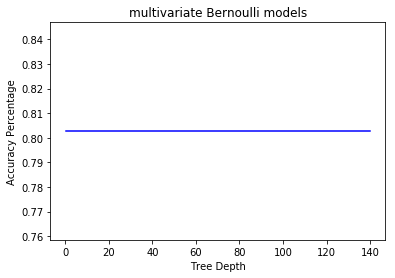

In [197]:
plt.plot(alphas, all_score,color="blue",label="Train_Validation_Accuracy")
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Percentage')
plt.title(ML_NAME)

plt.show()

In [ ]:
#Model 12: ExtraTreeClassifier

In [200]:
all_score=[]
ML_NAME='Extremely randomized tree classifier'
clf=ExtraTreeClassifier()
score = np.mean(cross_val_score(clf, X_train, Y_train1, n_jobs= 4, cv=4))
csv_out.writerow([ML_NAME, depth, f_name, score])
all_score.append(score)
    
all_score

[0.8196428571428571]

In [201]:
#Model 13: RandomForestClassifier

In [202]:
all_score=[]
ML_NAME='Random Forest Classifier'
depth_list = np.concatenate((np.arange(1,10) , np.arange(10,20,2), np.arange(20,50, 5),  np.arange(50,150, 10)))
for depth in depth_list:
    clf=RandomForestClassifier(n_estimators=depth)
    score = np.mean(cross_val_score(clf, X_train, Y_train1, n_jobs= 4, cv=4))
    csv_out.writerow([ML_NAME, depth, f_name, score])
    all_score.append(score)
    
all_score

[0.6089285714285715,
 0.6505952380952381,
 0.7767857142857143,
 0.8154761904761905,
 0.7964285714285715,
 0.7976190476190477,
 0.8142857142857143,
 0.7976190476190477,
 0.8142857142857143,
 0.8142857142857143,
 0.8142857142857143,
 0.8142857142857143,
 0.8142857142857143,
 0.8321428571428572,
 0.8321428571428572,
 0.8142857142857143,
 0.8142857142857143,
 0.8321428571428572,
 0.8142857142857143,
 0.8142857142857143,
 0.8321428571428572,
 0.8142857142857143,
 0.8142857142857143,
 0.8142857142857143,
 0.8142857142857143,
 0.8142857142857143,
 0.8142857142857143,
 0.8142857142857143,
 0.8142857142857143,
 0.8142857142857143]

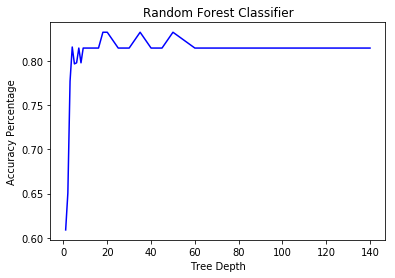

In [203]:
plt.plot(depth_list, all_score,color="blue",label="Train_Validation_Accuracy")
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Percentage')
plt.title(ML_NAME)

plt.show()

In [204]:
fi.close()

In [45]:

clf = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=25,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

model=clf.fit(X_train,Y_train1)
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

In [46]:
feature_importance

array([ 86.25453074,  16.0693714 ,  18.92632692, 100.        ,
        35.68190673,  60.39261279,  96.82978513])

In [47]:
RelativeDf=pd.DataFrame({'Feature':clms1[:len(feature_importance)],
                                         'Relative Importance':list(feature_importance)})
RelativeDf=RelativeDf.sort_values(by=['Relative Importance'], ascending=False)
RelativeDf

,Feature,Relative Importance
3,skinTemperature,100.000000
6,resistance,96.829785
0,roomTempreture,86.254531
5,met,60.392613
4,clothingScore,35.681907
2,heartRate,18.926327
1,roomHumidity,16.069371


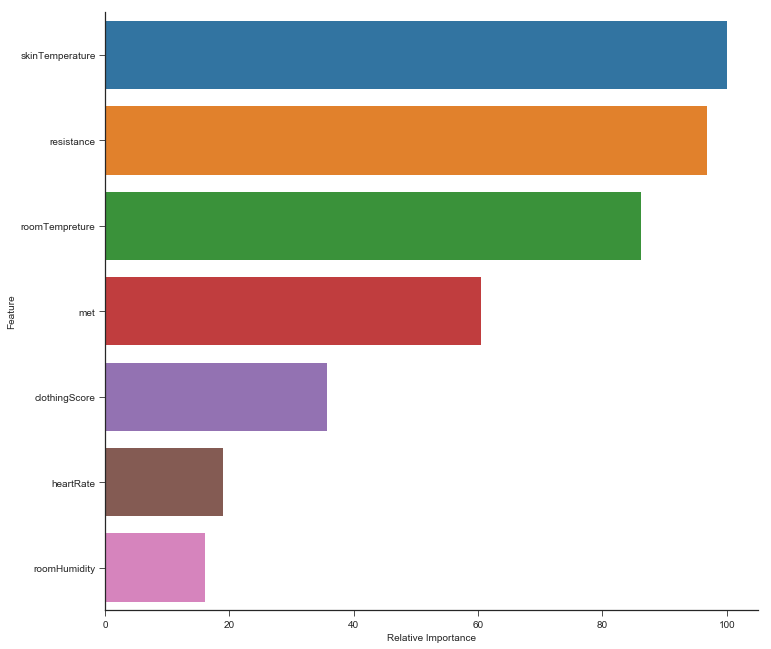

In [48]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 11)
sns.barplot(x="Relative Importance", y="Feature", data=RelativeDf)
sns.despine()

fig.savefig('example.png')